### WEBSITE TRAFFIC ANALYSIS

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\web_traffic_analysis_project\data\web_traffic.csv")
df

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,2023-07-01,New,Mobile,120,3
1,2,2023-07-02,Returning,Desktop,300,5
2,3,2023-07-03,New,Tablet,240,4
3,4,2023-07-04,Returning,Mobile,180,3
4,5,2023-07-05,New,Desktop,350,6
5,6,2023-07-06,Returning,Tablet,260,4
6,7,2023-07-07,New,Mobile,190,3
7,8,2023-07-08,Returning,Desktop,400,7
8,9,2023-07-09,New,Tablet,210,4
9,10,2023-07-10,Returning,Mobile,220,5


In [3]:
# Converting the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0   2023-07-01
1   2023-07-02
2   2023-07-03
3   2023-07-04
4   2023-07-05
5   2023-07-06
6   2023-07-07
7   2023-07-08
8   2023-07-09
9   2023-07-10
Name: Date, dtype: datetime64[ns]

In [5]:
# Dataframe shape
df.shape

(10, 6)

In [8]:
# Data Types
df.dtypes

VisitID                     int64
Date               datetime64[ns]
UserType                   object
Device                     object
SessionDuration             int64
PagesVisited                int64
dtype: object

In [9]:
# Descriptive Statistics
df.describe()

,VisitID,Date,SessionDuration,PagesVisited
count,10.00000,10,10.000000,10.000000
mean,5.50000,2023-07-05 12:00:00,247.000000,4.400000
min,1.00000,2023-07-01 00:00:00,120.000000,3.000000
25%,3.25000,2023-07-03 06:00:00,195.000000,3.250000
50%,5.50000,2023-07-05 12:00:00,230.000000,4.000000
75%,7.75000,2023-07-07 18:00:00,290.000000,5.000000
max,10.00000,2023-07-10 00:00:00,400.000000,7.000000
std,3.02765,NaN,83.672643,1.349897


In [10]:
# Missing Values
df.isnull().sum()

VisitID            0
Date               0
UserType           0
Device             0
SessionDuration    0
PagesVisited       0
dtype: int64

### DATA VISUALIZATION

In [11]:
df.columns

Index(['VisitID', 'Date', 'UserType', 'Device', 'SessionDuration',
       'PagesVisited'],
      dtype='object')

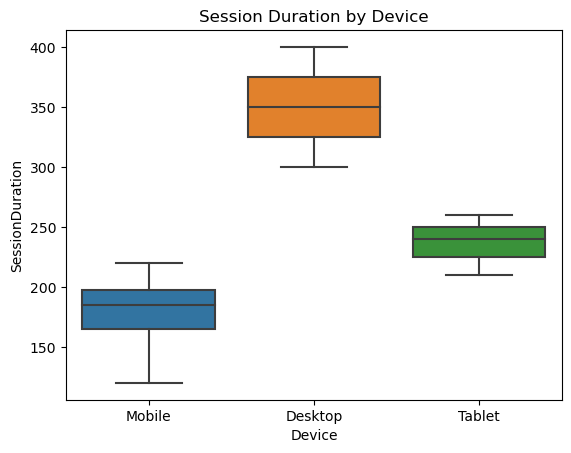

In [13]:
# Session duration by device boxplot sns
sns.boxplot(x="Device",y="SessionDuration",data=df)
plt.title("Session Duration by Device")
plt.show()

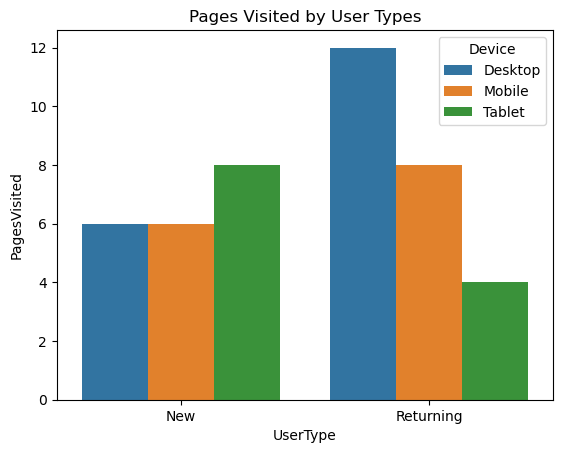

In [38]:
# Page visited by user types barplot with Device distribution in legend
grouped = df.groupby(["UserType", "Device"])["PagesVisited"].sum().reset_index()
sns.barplot(x="UserType",y="PagesVisited",data=grouped,hue="Device")
plt.title("Pages Visited by User Types")
plt.show()

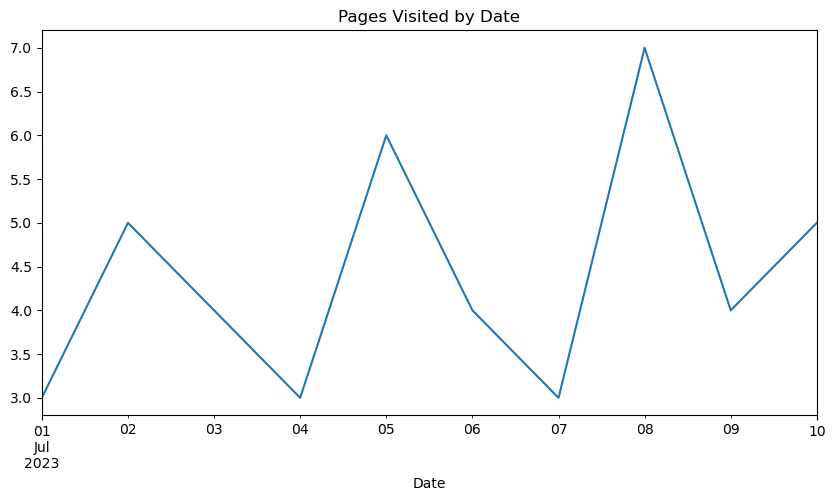

In [21]:
# Group data by date and analyze daily trend
df.groupby("Date")["PagesVisited"].sum().plot(kind="line",figsize=(10,5))
plt.title("Pages Visited by Date")
plt.show()

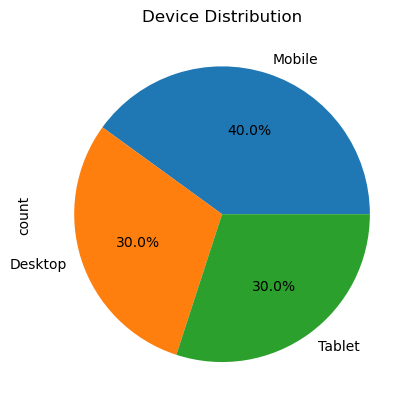

In [22]:
# Piechart of device distribution
df["Device"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Device Distribution")
plt.show()

In [23]:
# Comparing the avg pages visited by device type
df.groupby("Device")["PagesVisited"].mean()

Device
Desktop    6.0
Mobile     3.5
Tablet     4.0
Name: PagesVisited, dtype: float64

In [26]:
df

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,2023-07-01,New,Mobile,120,3
1,2,2023-07-02,Returning,Desktop,300,5
2,3,2023-07-03,New,Tablet,240,4
3,4,2023-07-04,Returning,Mobile,180,3
4,5,2023-07-05,New,Desktop,350,6
5,6,2023-07-06,Returning,Tablet,260,4
6,7,2023-07-07,New,Mobile,190,3
7,8,2023-07-08,Returning,Desktop,400,7
8,9,2023-07-09,New,Tablet,210,4
9,10,2023-07-10,Returning,Mobile,220,5


In [28]:
# Peak Traffic days in descending order
df.groupby("Date")["PagesVisited"].sum().sort_values(ascending=False)

Date
2023-07-08    7
2023-07-05    6
2023-07-02    5
2023-07-10    5
2023-07-03    4
2023-07-06    4
2023-07-09    4
2023-07-01    3
2023-07-04    3
2023-07-07    3
Name: PagesVisited, dtype: int64

### CONCLUSIONS

### 1.Which device performs better ?

### Desktop devices have the longest median session duration, indicating that users spend more time on desktops compared to mobile and tablet devices.

### 2.Are new or returning users more engaged?

### Returning users are more engaged than new users across all devices.And Returning Users are more interested in Desktop and mobile but New User are intrested in tablets

### 3.Any noticeable trends over time?

### The line chart shows the number of pages visited over a period from July 1 to July 10, 2023.
Trends :
There is significant variability in the number of pages visited each day.
The highest number of pages visited occurs on July 8 (~7 pages).
The lowest number of pages visited occurs on July 7 (~3 pages).